## Sample Analysis

In [1]:
import pickle
with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

with open('ROMS_26yr_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

with open('/srv/scratch/z5297792/Sample/sample_data.pkl', 'rb') as file:
    sample_data1 = pickle.load(file)
print(sample_data1.keys())

with open('/srv/scratch/z5297792/Sample/500plus_sample_data.pkl', 'rb') as file:
    sample_data2 = pickle.load(file)
print(sample_data2.keys())

with open('/srv/scratch/z5297792/Sample/frontier_sample_data.pkl', 'rb') as file:
    frontier_sample_data = pickle.load(file)
print(frontier_sample_data.keys())


dict_keys(['Eddy8', 'Eddy9', 'Eddy22', 'Eddy32', 'Eddy60', 'Eddy110', 'Eddy117', 'Eddy124', 'Eddy133', 'Eddy134', 'Eddy141', 'Eddy142', 'Eddy149', 'Eddy151', 'Eddy161', 'Eddy171'])
dict_keys(['Eddy739', 'Eddy745', 'Eddy749', 'Eddy761', 'Eddy775', 'Eddy788', 'Eddy790', 'Eddy792', 'Eddy797', 'Eddy827'])
dict_keys(['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775'])


In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import time

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho'][:]
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho'][:]
lat_rho = np.transpose(lat_rho, axes=(1, 0))
f  = dataset.variables['f'][:]
f = np.transpose(f, axes=(1, 0))
h = dataset.variables['h'][:]
h = np.transpose(h, axes=(1, 0))
z_r = np.load('/home/z5297792/UNSW-MRes/MRes/z_r/z_r.npy')
z_r = np.transpose(z_r, (1, 2, 0))
temp_ave = np.load('/srv/scratch/z5297792/Climatology/temp_ave.npy')
CurSpeed_ave = np.load('/srv/scratch/z5297792/Climatology/CurSpeed_ave.npy')

import re
def extract_number(s):
    match = re.search(r'\d+', s)
    return int(match.group()) if match else None

eddy = 'Eddy22' # AE no-tilt # good \
eddy = 'Eddy110' # AE tilt # good off my own analysis \
eddy = 'Eddy134' # CE non-tilt # best \
eddy = 'Eddy133' # CE tilt \
\
eddy = 'Eddy790' # AE non-tilt # best \
eddy = 'Eddy761' # CE non-tilt # not bad \
eddy = 'Eddy749' # CE tilt # good \
eddy = 'Eddy775' # CE tilt # best \
\
The Sample Frontiers: \
\
AE790 no-tilt \
AE110 tilt \
CE134 no-tilt \
CE775 tilt 




## 1st Batch

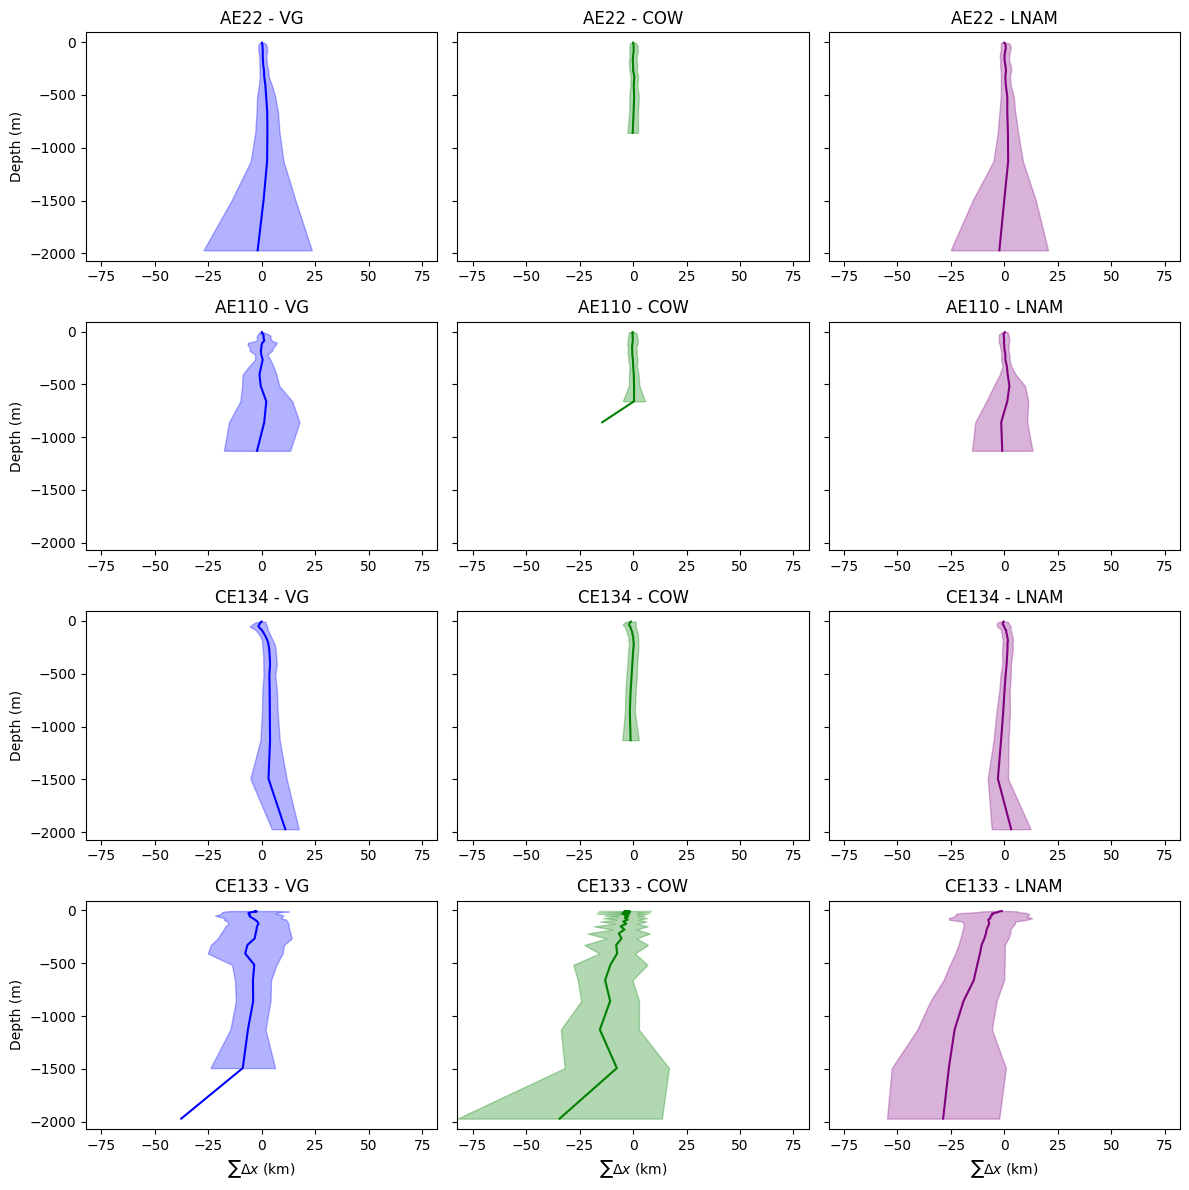

In [3]:
the_chosen_eddies = ['Eddy22', 'Eddy110', 'Eddy134', 'Eddy133']

DEPTH_LVL_LIMIT = 25

method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

# fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_chosen_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        x_df = pd.DataFrame({f'T{t}': sample_data1[eddy][f'T{t}'][method]['x'] for t in range(30)})
        x_mean, x_std = x_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().mean(axis=1)/1000, x_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().std(axis=1)/1000
        ax.plot(x_mean, z_r[150, 150, :len(x_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(x_mean)], x_mean - x_std, x_mean + x_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta x$ (km)")

        xmin = min(np.nanmin(x_mean - x_std), xmin)
        xmax = max(np.nanmax(x_mean + x_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()


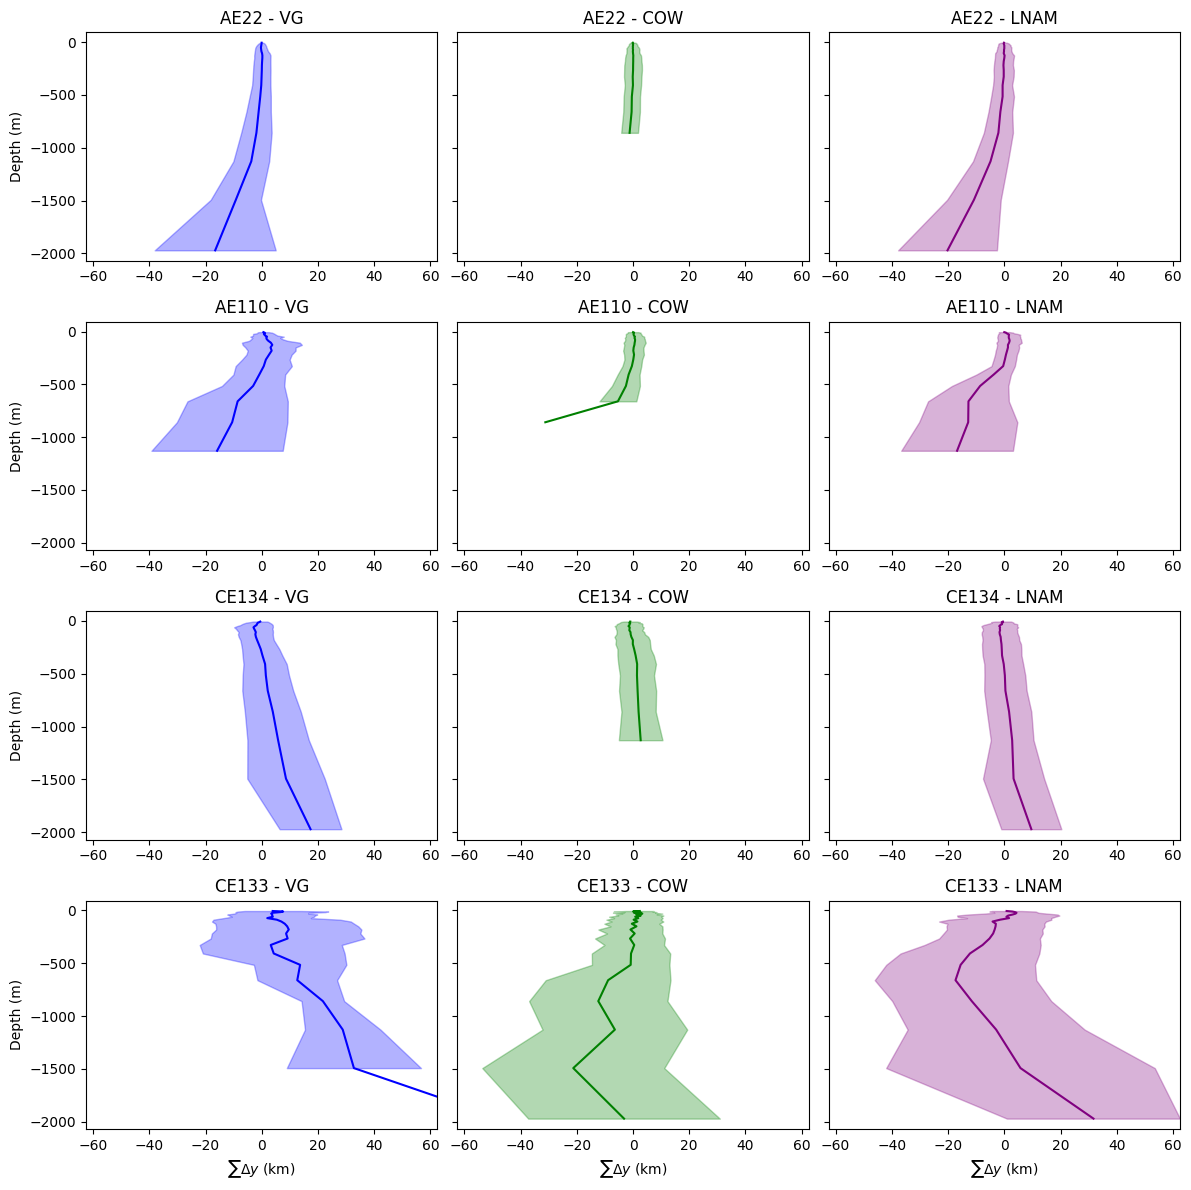

In [4]:
the_chosen_eddies = ['Eddy22', 'Eddy110', 'Eddy134', 'Eddy133']

DEPTH_LVL_LIMIT = 25

method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

# fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_chosen_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        y_df = pd.DataFrame({f'T{t}': sample_data1[eddy][f'T{t}'][method]['y'] for t in range(30)})
        y_mean, y_std = y_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().mean(axis=1)/1000, y_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().std(axis=1)/1000
        ax.plot(y_mean, z_r[150, 150, :len(y_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(y_mean)], y_mean - y_std, y_mean + y_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta y$ (km)")

        xmin = min(np.nanmin(y_mean - y_std), xmin)
        xmax = max(np.nanmax(y_mean + y_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()

## 2nd Batch

In [5]:
# eddy = 'Eddy790' # AE non-tilt # same as AE22
# eddy = 'Eddy761' # CE non-tilt # same as CE134
# eddy = 'Eddy749' # CE tilt # good
# eddy = 'Eddy775' # CE tilt # better than CE749 ^


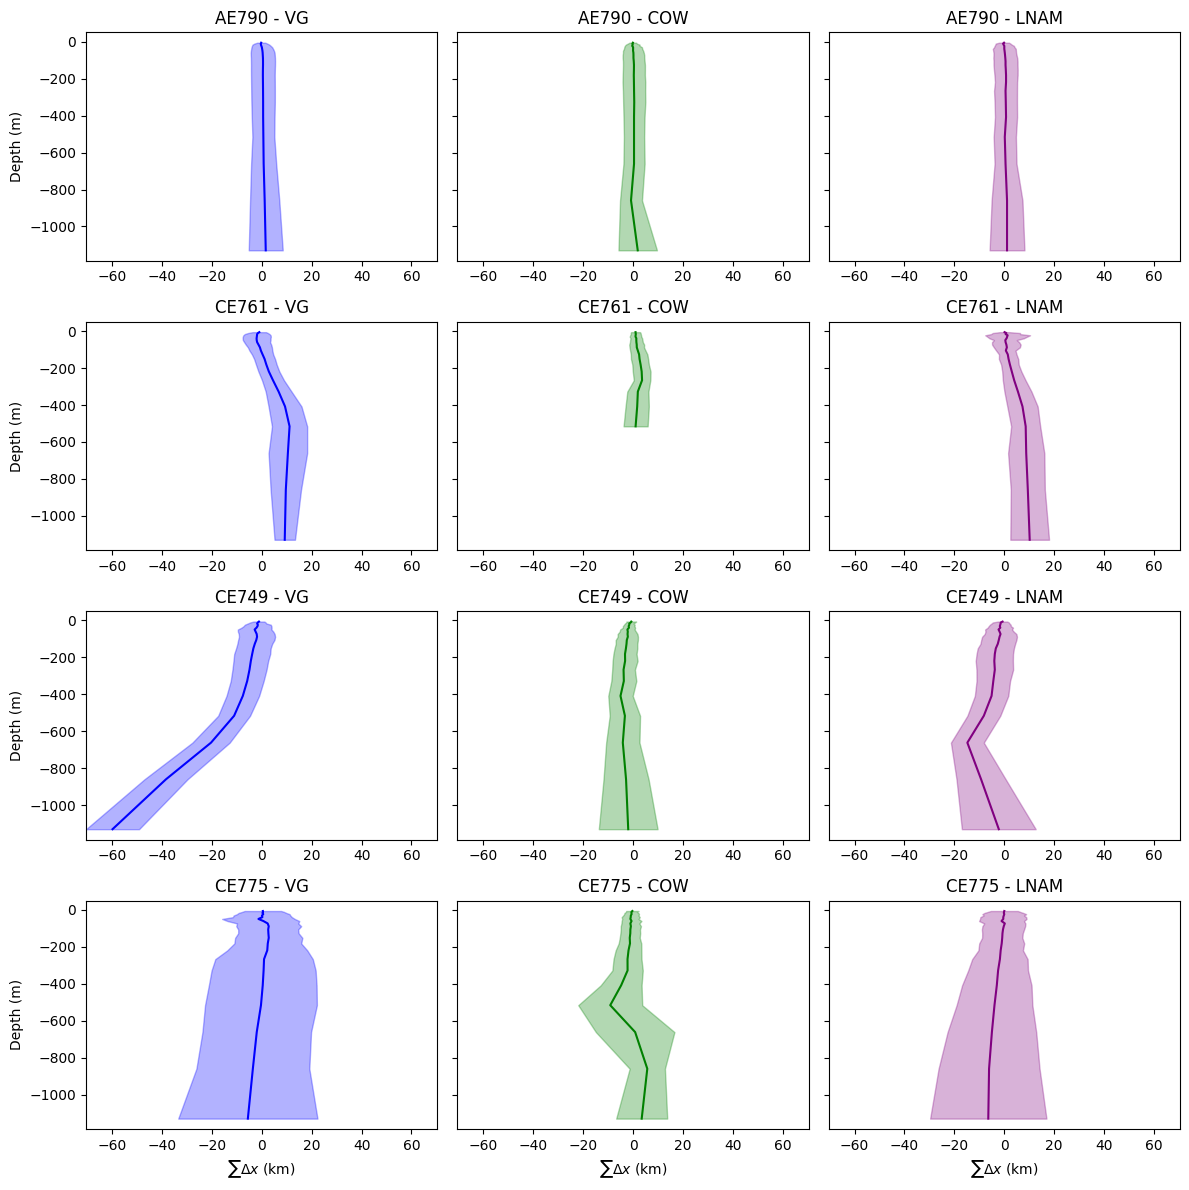

In [6]:
the_chosen_eddies = ['Eddy790', 'Eddy761', 'Eddy749', 'Eddy775']

DEPTH_LVL_LIMIT = 25

method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

# fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_chosen_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        x_df = pd.DataFrame({f'T{t}': sample_data2[eddy][f'T{t}'][method]['x'] for t in range(30)})
        x_mean, x_std = x_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().mean(axis=1)/1000, x_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().std(axis=1)/1000
        ax.plot(x_mean, z_r[150, 150, :len(x_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(x_mean)], x_mean - x_std, x_mean + x_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta x$ (km)")

        xmin = min(np.nanmin(x_mean - x_std), xmin)
        xmax = max(np.nanmax(x_mean + x_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()

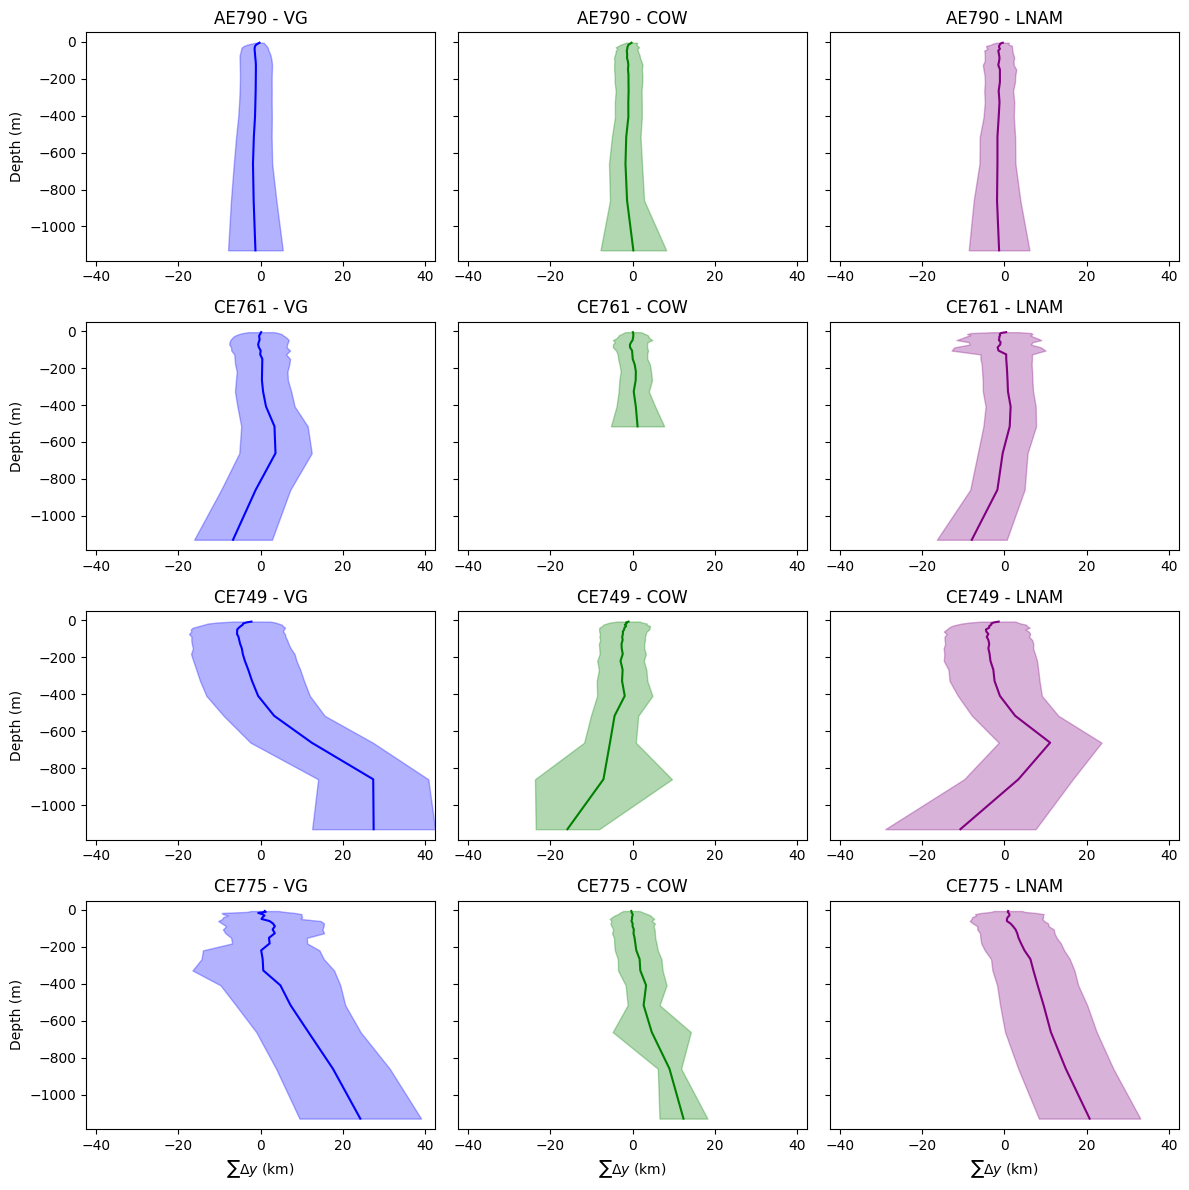

In [7]:
the_chosen_eddies = ['Eddy790', 'Eddy761', 'Eddy749', 'Eddy775']

DEPTH_LVL_LIMIT = 25

method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

# fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharex=True, sharey=True)
fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_chosen_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        y_df = pd.DataFrame({f'T{t}': sample_data2[eddy][f'T{t}'][method]['y'] for t in range(30)})
        y_mean, y_std = y_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().mean(axis=1)/1000, y_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().std(axis=1)/1000
        ax.plot(y_mean, z_r[150, 150, :len(y_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(y_mean)], y_mean - y_std, y_mean + y_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta y$ (km)")

        xmin = min(np.nanmin(y_mean - y_std), xmin)
        xmax = max(np.nanmax(y_mean + y_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()

## The Frontiers

AE790 no-tilt \
AE110 tilt \
CE134 no-tilt \
CE775 tilt 

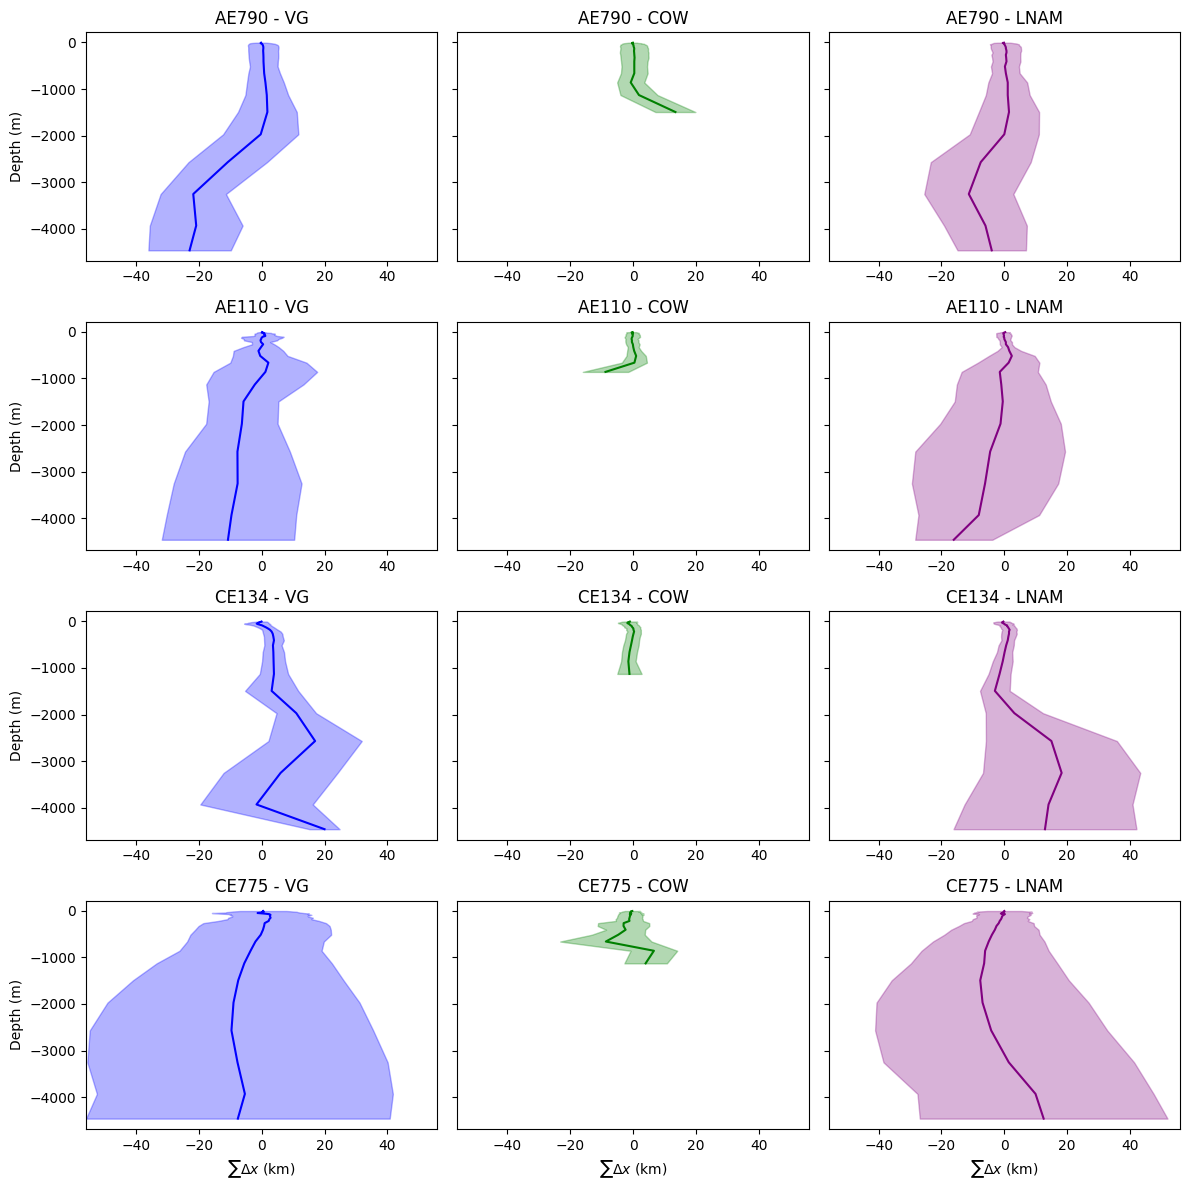

In [10]:
the_frontier_eddies = ['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775']

DEPTH_LVL_LIMIT = 29

method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_frontier_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        x_df = pd.DataFrame({f'T{t}': frontier_sample_data[eddy][f'T{t}'][method]['x'] for t in range(30)})
        x_mean, x_std = x_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().mean(axis=1)/1000, x_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().std(axis=1)/1000
        ax.plot(x_mean, z_r[150, 150, :len(x_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(x_mean)], x_mean - x_std, x_mean + x_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta x$ (km)")

        xmin = min(np.nanmin(x_mean - x_std), xmin)
        xmax = max(np.nanmax(x_mean + x_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()

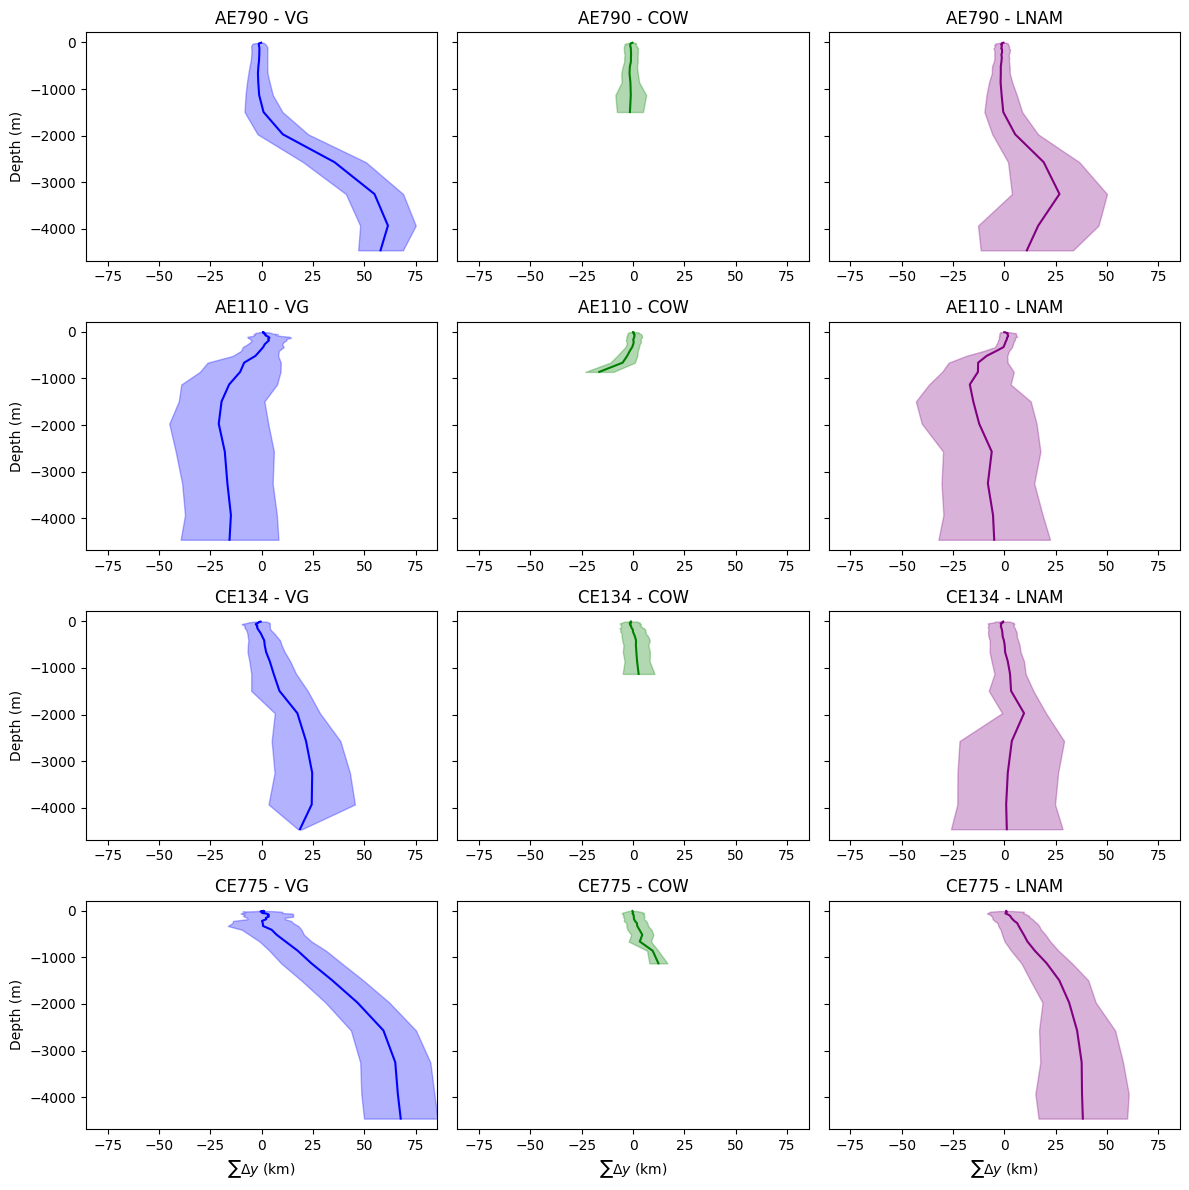

In [11]:
the_frontier_eddies = ['Eddy790', 'Eddy110', 'Eddy134', 'Eddy775']

DEPTH_LVL_LIMIT = 29

method_colors = {'VG': 'blue', 'COW': 'green', 'LNAM': 'purple'}

fig, axes = plt.subplots(4, 3, figsize=(12, 12), sharey=True)

xmin = xmax = 0
for i, eddy in enumerate(the_frontier_eddies):
    for j, (method, color) in enumerate(method_colors.items()):
        ax = axes[i, j]
        y_df = pd.DataFrame({f'T{t}': frontier_sample_data[eddy][f'T{t}'][method]['y'] for t in range(30)})
        y_mean, y_std = y_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().mean(axis=1)/1000, y_df.iloc[:DEPTH_LVL_LIMIT].diff().cumsum().std(axis=1)/1000
        ax.plot(y_mean, z_r[150, 150, :len(y_mean)], color=color)
        ax.fill_betweenx(z_r[150, 150, :len(y_mean)], y_mean - y_std, y_mean + y_std, color=color, alpha=0.3)
        cyc = 'AE' if eddies[eddy].iloc[0]['Vort'] > 0 else 'CE'
        ax.set_title(cyc + str(extract_number(eddy)) + ' - ' + method)
        if j == 0: ax.set_ylabel("Depth (m)")
        if i == 3: ax.set_xlabel(r"$\sum\Delta y$ (km)")

        xmin = min(np.nanmin(y_mean - y_std), xmin)
        xmax = max(np.nanmax(y_mean + y_std), xmax)

# Set common x-axis limits
xabs = max(abs(xmin), abs(xmax))
x_lim = [-xabs, xabs]
for ax in axes.flat:
    ax.set_xlim(x_lim)

plt.tight_layout()
plt.show()